Name : J Karan Tejas

Roll No : 191EE126

In [1]:
import numpy as np
import IPython
from IPython.display import Audio , display
import scipy
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import pandas as pd

In [2]:
alpha = 1 + 126 % 4  
pi = np.pi

$\alpha = 3$

# Problem 1

Part 1

In [52]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})

In [53]:
Fs1, track1= wavfile.read('flute3.wav')
Fs2, track2= wavfile.read('piano3.wav')
Fs3, track3= wavfile.read('trumpet3.wav')
Fs4, track4= wavfile.read('violin3.wav')

track1 = track1/32767.0
track2 = track2/32767.0
track3 = track3/32767.0
track4 = track4/32767.0

print('Sampling rate of flute : {} Hz'.format(Fs1))
display(Audio(data=track1, rate=Fs1))
print('Sampling rate of piano : {} Hz'.format(Fs2))
display(Audio(data=track2, rate=Fs2))
print('Sampling rate of trumpet : {} Hz'.format(Fs3))
display(Audio(data=track3, rate=Fs3))
print('Sampling rate of violin : {} Hz'.format(Fs4))
display(Audio(data=track4, rate=Fs4))

Sampling rate of flute : 11025 Hz


Sampling rate of piano : 11025 Hz


Sampling rate of trumpet : 11025 Hz


Sampling rate of violin : 11025 Hz


In [54]:
def plot_magnitude_spectrum(x,fs,max_freq,l_label) :
  C = int(len(x) / 2)
  if max_freq:
    C = int(C * max_freq / float(fs) * 2) 
  mag_spectrum = np.abs(np.fft.fft(x)[0:C])
  N = fs * np.arange(0, C) / len(x);
  plt.plot(N,mag_spectrum,label = l_label)
  plt.title('Magnitude Sprectrum of {}'.format(l_label), fontsize = 20)
  plt.ylabel('$|X(F)|$', fontsize = 16)
  plt.xlabel('Frequency', fontsize = 16)
  plt.legend(loc = 'upper right')
  plt.figure()
  plt.semilogy(N,mag_spectrum,label = l_label)
  plt.title('Magnitude Sprectrum of {} in dB'.format(l_label), fontsize = 20)
  plt.ylabel('$|X(F)|$', fontsize = 16)
  plt.xlabel('Frequency', fontsize = 16)
  plt.legend(loc = 'upper right')
  plt.figure()

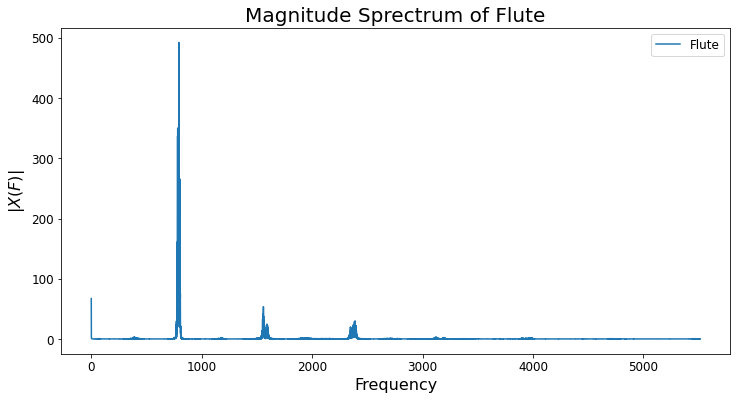

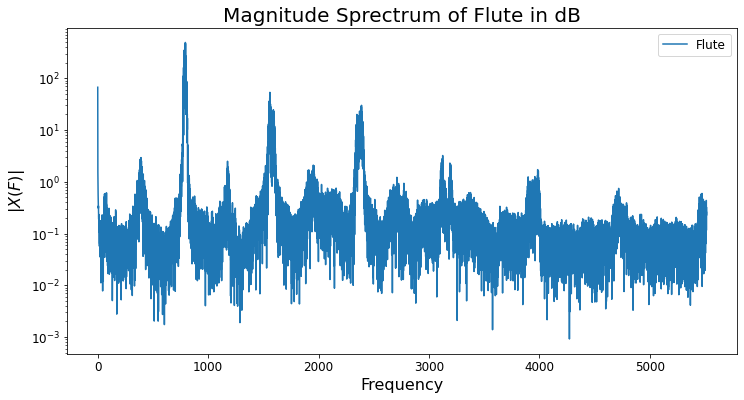

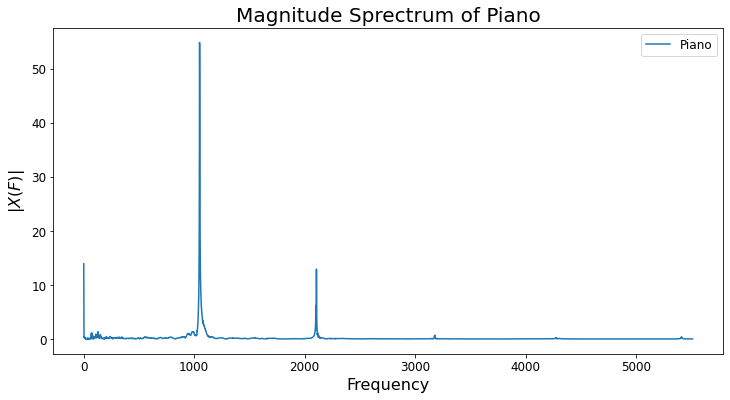

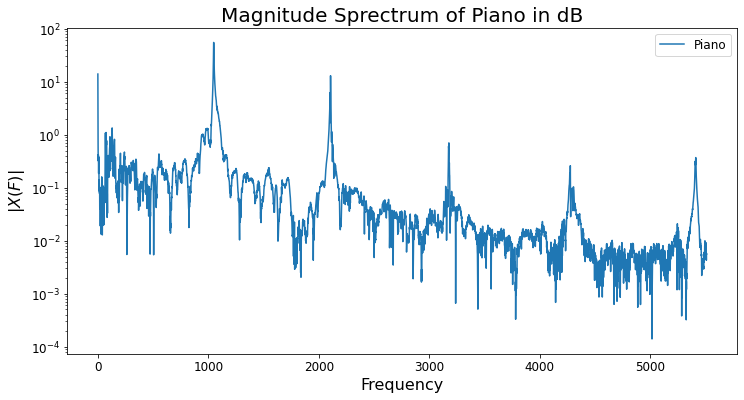

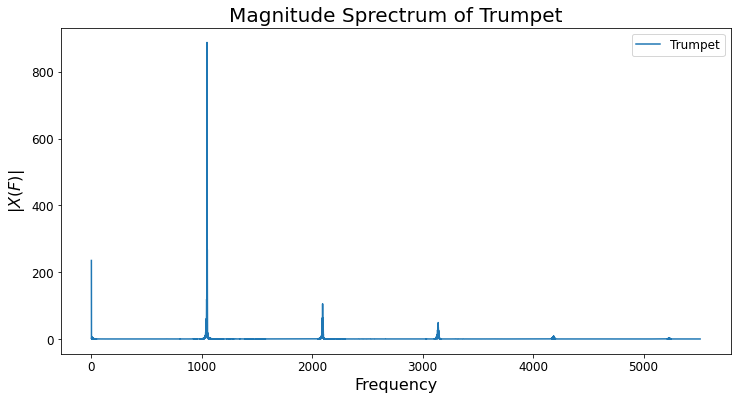

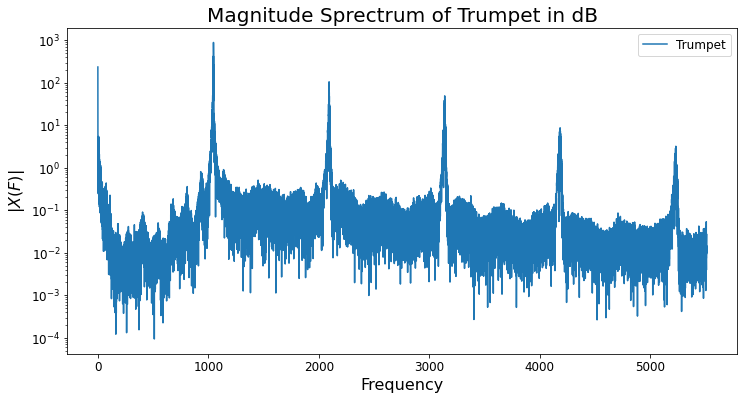

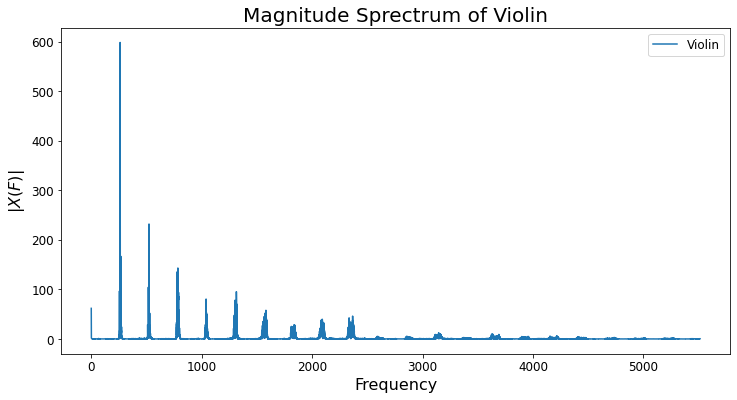

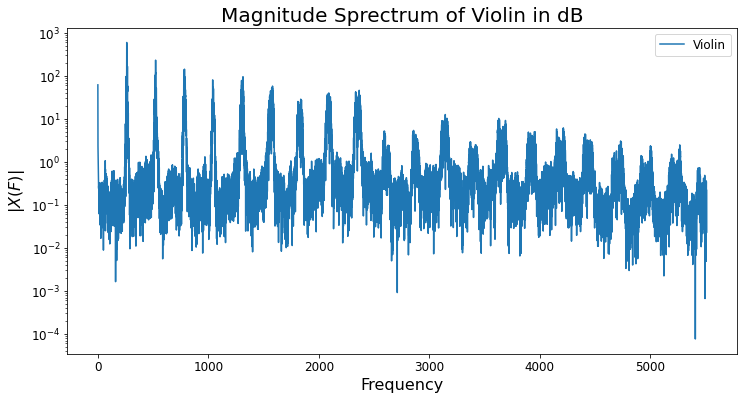

<Figure size 864x432 with 0 Axes>

In [55]:
plot_magnitude_spectrum(track1, Fs1, Fs1/2,'Flute')
plot_magnitude_spectrum(track2, Fs2, Fs2/2,'Piano')
plot_magnitude_spectrum(track3, Fs3, Fs3/2,'Trumpet')
plot_magnitude_spectrum(track4, Fs4, Fs4/2,'Violin')

In [56]:
def find_fundamental_harmonic(track, fs):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i]) <= 0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  peaks = sp.find_peaks(np.abs(TRACK))[0] 
  fundamental_frequency = (peaks[0]/len(TRACK)) * fs
  return fundamental_frequency

In [57]:
fundamental_freq_flute = find_fundamental_harmonic(track1, Fs1)
fundamental_freq_piano = find_fundamental_harmonic(track2, Fs2)
fundamental_freq_trumpet = find_fundamental_harmonic(track3, Fs3)
fundamental_freq_violin = find_fundamental_harmonic(track4, Fs4)

print('The Fundamental frequency of the flute is {} Hz'.format(fundamental_freq_flute))
print('The Fundamental frequency of the piano is {} Hz'.format(fundamental_freq_piano))
print('The Fundamental frequency of the trumpet is {} Hz'.format(fundamental_freq_trumpet))
print('The Fundamental frequency of the violin is {} Hz'.format(fundamental_freq_violin))

The Fundamental frequency of the flute is 775.4496644295302 Hz
The Fundamental frequency of the piano is 1048.3772727272726 Hz
The Fundamental frequency of the trumpet is 1043.7007199177235 Hz
The Fundamental frequency of the violin is 255.43636363636364 Hz


Part 2

In [58]:
min = abs(fundamental_freq_flute - fundamental_freq_piano)
for i in range(4) :
  fs,track = wavfile.read('flute{}.wav'.format(i + 1))
  track = track / 32767.0
  f_freq = find_fundamental_harmonic(track,fs)
  print('Fundamental Frequency of flute{} : {} Hz'.format(i+1,f_freq))
  if abs(f_freq - fundamental_freq_piano) < min :
    min = abs(f_freq - fundamental_freq_piano)
    closest_flute = i+1
    closest_freq = f_freq

print('Fundamental Frequency of flute{}.wav is closest to fundamental frequency of piano3.wav, i.e, {} Hz and {} Hz respectively.'.format(closest_flute,closest_freq,fundamental_freq_piano))

Fundamental Frequency of flute1 : 1034.7 Hz
Fundamental Frequency of flute2 : 256.69241379310347 Hz
Fundamental Frequency of flute3 : 775.4496644295302 Hz
Fundamental Frequency of flute4 : 518.1 Hz
Fundamental Frequency of flute1.wav is closest to fundamental frequency of piano3.wav, i.e, 1034.7 Hz and 1048.3772727272726 Hz respectively.


$\beta = 1$

# Problem 2

Part 1

In [18]:
whistle_fs , whistle_track = wavfile.read('key_whistle.wav')
whistle_track = whistle_track/32767.0
print('Sampling rate: {}Hz'.format(whistle_fs))
display(Audio(data = whistle_track, rate = whistle_fs))

Sampling rate: 48000Hz


Part 2

In [19]:
plt.rcParams.update({
    "figure.figsize": (10,7),
    "font.size": 12})

def plot_spectrum(x,fs,max_freq,l_label) :
  C = int(len(x) / 2)
  if max_freq:
    C = int(C * max_freq / float(fs) * 2) 
  mag_spectrum = np.abs(np.fft.fft(x)[0:C])
  N = fs * np.arange(0, C) / len(x);
  plt.plot(N,mag_spectrum,label = l_label)
  plt.title('Magnitude Sprectrum of {}'.format(l_label), fontsize = 20)
  plt.ylabel('$|X(F)|$', fontsize = 16)
  plt.xlabel('Frequency', fontsize = 16)
  plt.legend(loc = 'upper right')
  plt.figure()

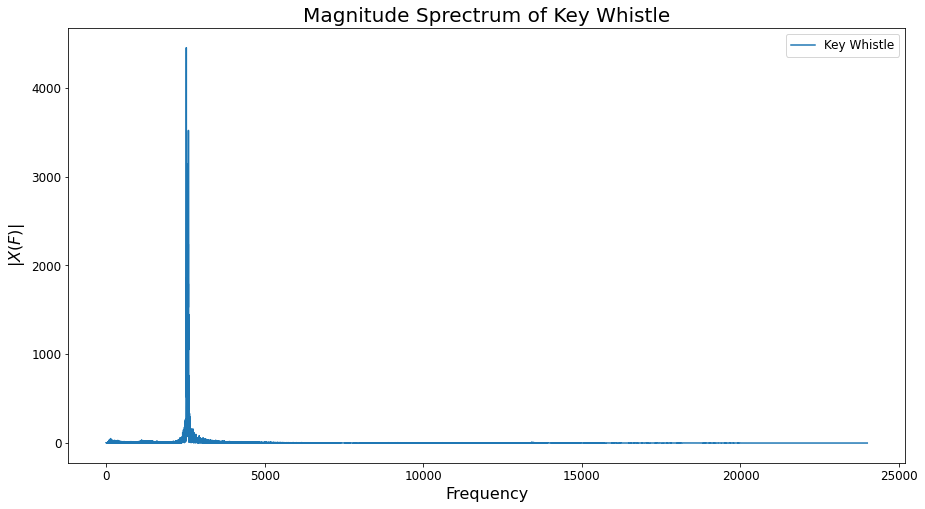

<Figure size 1080x576 with 0 Axes>

In [112]:
plot_spectrum(whistle_track , whistle_fs, whistle_fs/2,'Key Whistle')

In [20]:
def find_fundamental_harmonic(track, fs):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i]) <= 0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  peaks = sp.find_peaks(np.abs(TRACK))[0] 
  fundamental_frequency = (peaks[0]/len(TRACK)) * fs
  return fundamental_frequency

In [21]:
key_freq = find_fundamental_harmonic(whistle_track,whistle_fs)
print('Fundamental Frequency of the key whistle is {}'.format(key_freq))

Fundamental Frequency of the key whistle is 2513.095238095238


Part 3

In [22]:
!pip install ffmpeg-python

In [23]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [24]:
print('Fundamental Frequency of Key Whistle is {}'.format(key_freq))
test_cases = []
number_of_test = 4
for i in range(number_of_test) :
  test_track, test_fs = get_audio()
  test_cases.append((test_track,test_fs))
  wavfile.write('testfile{}.wav'.format(i+1), test_fs, test_track)
  test_track = test_track / 32767.0
  display(Audio(data = test_track, rate = test_fs))
  test_f_freq = find_fundamental_harmonic(test_track, test_fs)
  print('Fundamental Frequency of Recording {} is {}'.format(i+1,test_f_freq))
  if abs(test_f_freq - key_freq) < 0.05 * key_freq :
    print('ACCESS GRANTED')
  else :
    print('ACCESS DENIED')

Fundamental Frequency of Key Whistle is 2513.095238095238


Fundamental Frequency of Recording 1 is 2433.3333333333335
ACCESS GRANTED


Fundamental Frequency of Recording 2 is 2436.3636363636365
ACCESS GRANTED


Fundamental Frequency of Recording 3 is 2803.095238095238
ACCESS DENIED


Fundamental Frequency of Recording 4 is 2776.4069264069262
ACCESS DENIED


Part 4

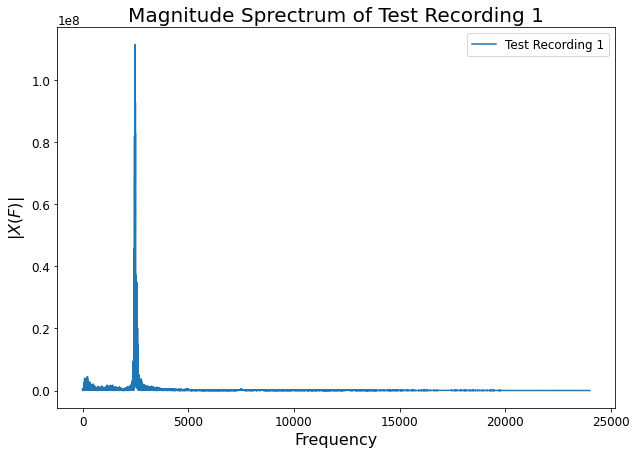

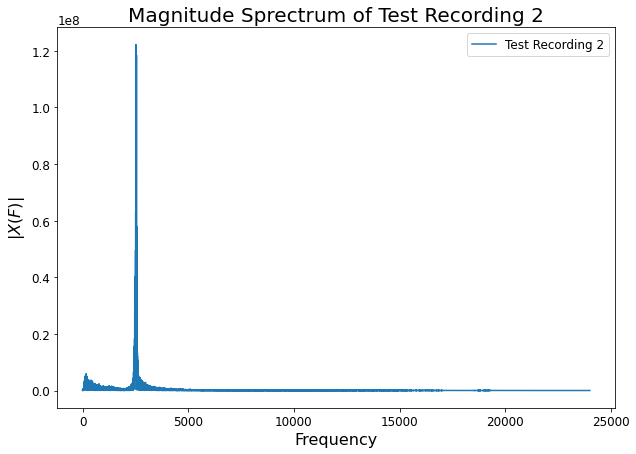

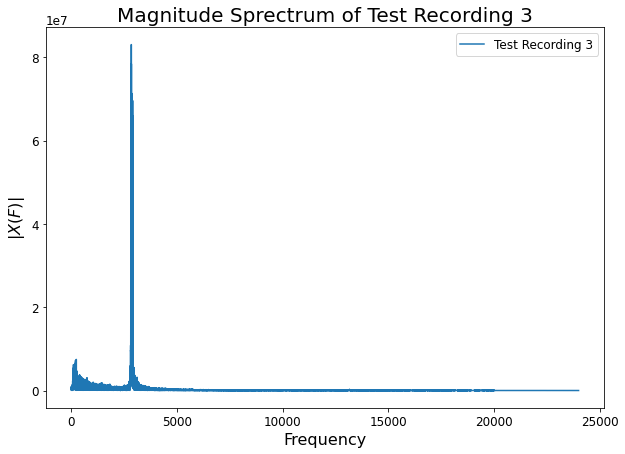

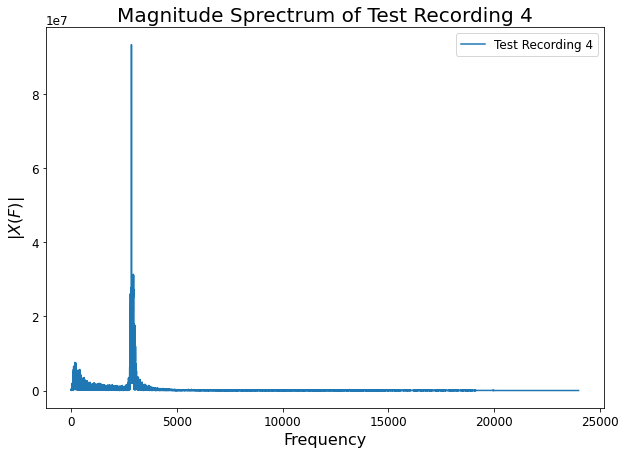

<Figure size 720x504 with 0 Axes>

In [25]:
for i in range(number_of_test) :
  plot_spectrum(test_cases[i][0] ,test_cases[i][1] , test_cases[i][1]/2,'Test Recording {}'.format(i + 1))

# Problem 3

In [59]:
def plot_spectrum(x,fs,max_freq,l_label) :
  C = int(len(x) / 2)
  if max_freq:
    C = int(C * max_freq / float(fs) * 2) 
  mag_spectrum = np.abs(np.fft.fft(x)[0:C])
  N = fs * np.arange(0, C) / len(x);
  plt.plot(N,mag_spectrum,label = l_label)
  plt.title('Magnitude Sprectrum of {}'.format(l_label), fontsize = 20)
  plt.ylabel('$|X(F)|$', fontsize = 16)
  plt.xlabel('Frequency', fontsize = 16)
  plt.legend(loc = 'upper right')
  plt.figure()

In [60]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})

Sampling rate: 44100Hz


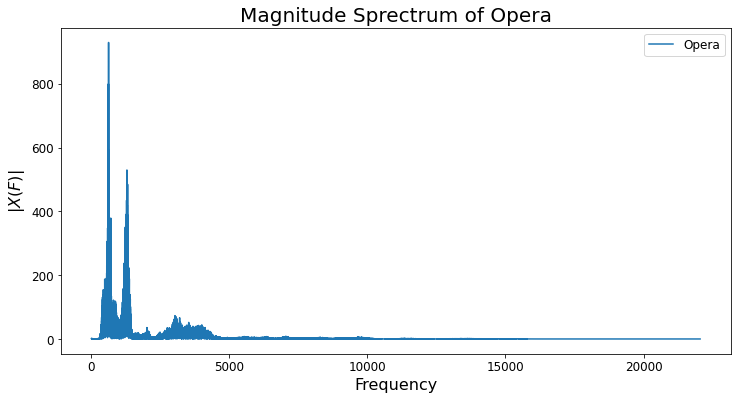

<Figure size 864x432 with 0 Axes>

In [61]:
opera_fs, opera_track = wavfile.read('Opera.wav')
opera_track = opera_track/32767.0
print('Sampling rate: {}Hz'.format(opera_fs))
display(Audio(data=opera_track, rate= opera_fs))
plot_spectrum(opera_track,opera_fs,opera_fs/2,'Opera')

In [62]:
parts = []
start_point = 0
end_point = 0
temp = int(opera_track.shape[0]/ 10)

for i in range(10):
  end_point += temp
  if i == 9 :
    parts.append(opera_track[start_point : int(opera_track.shape[0])])
    continue
  parts.append(opera_track[start_point : end_point])
  start_point = end_point + 1

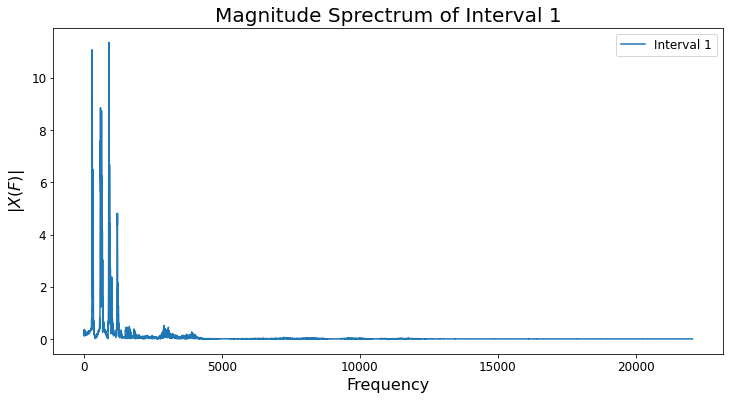

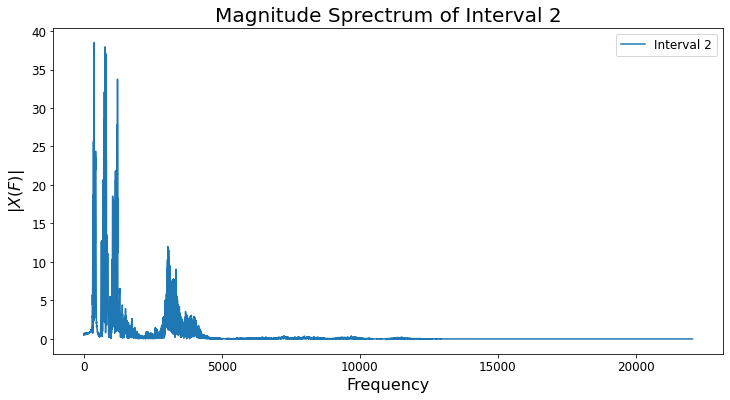

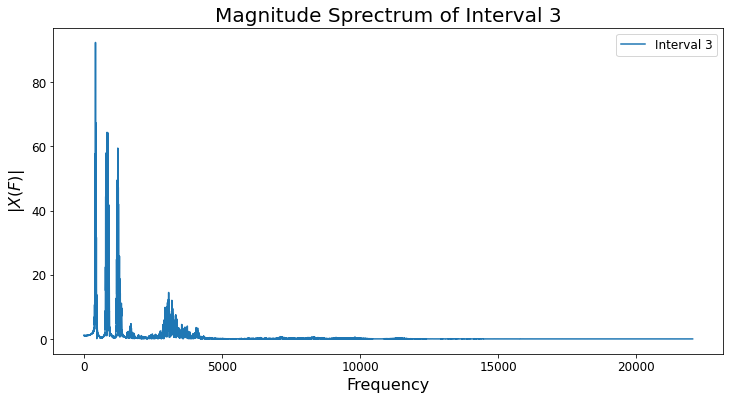

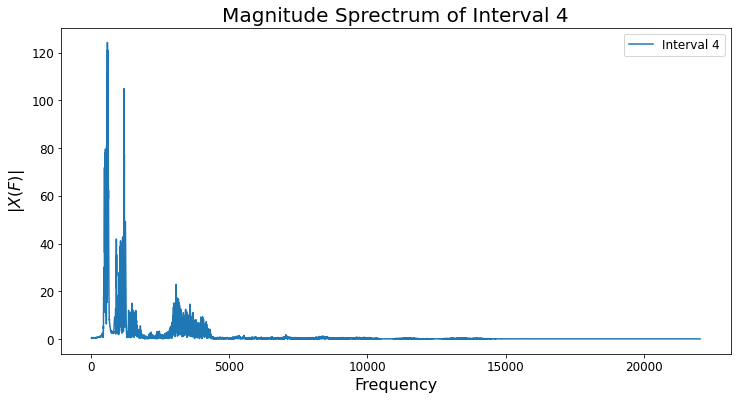

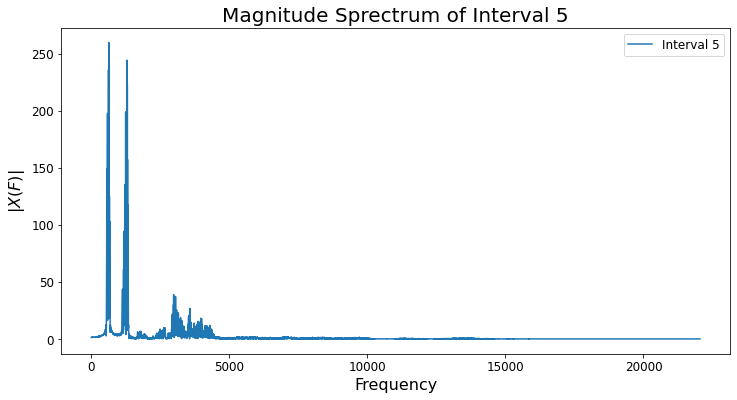

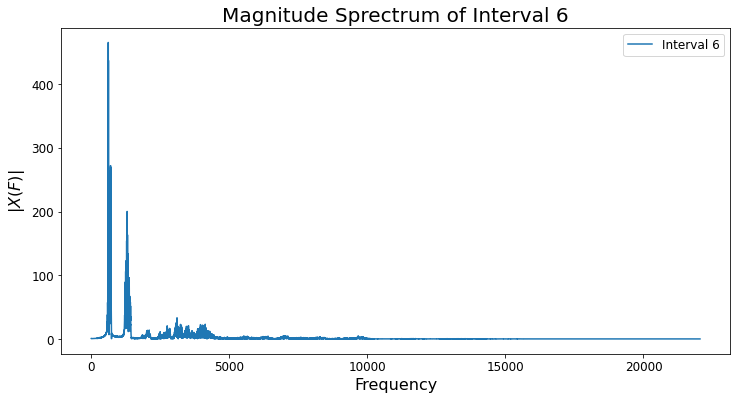

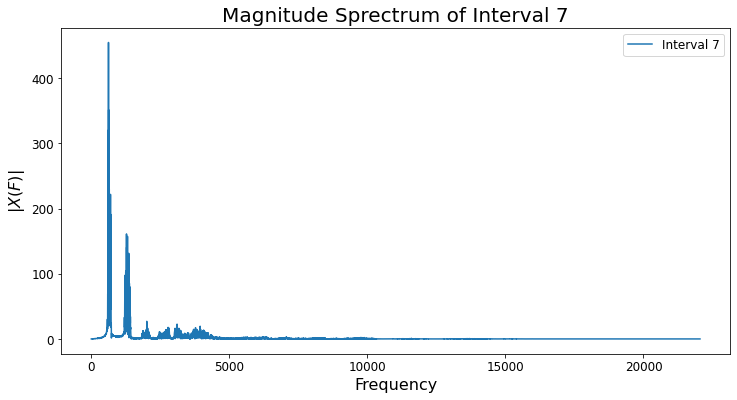

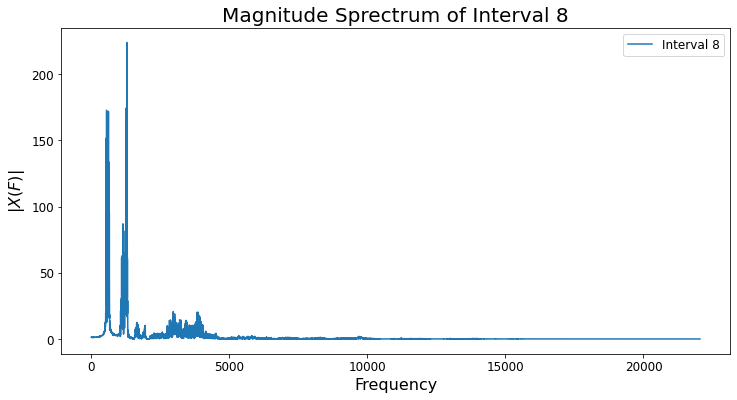

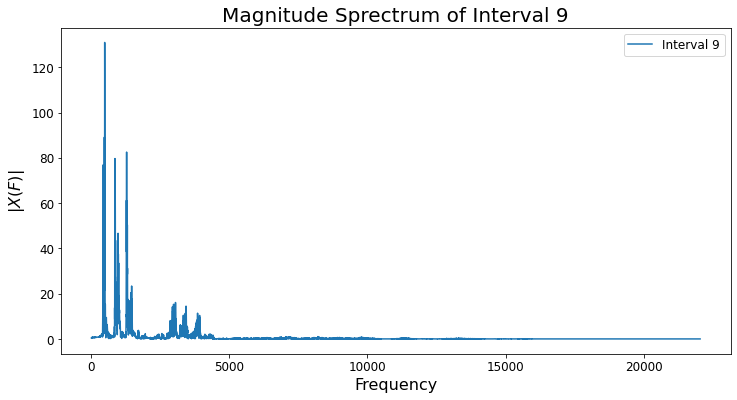

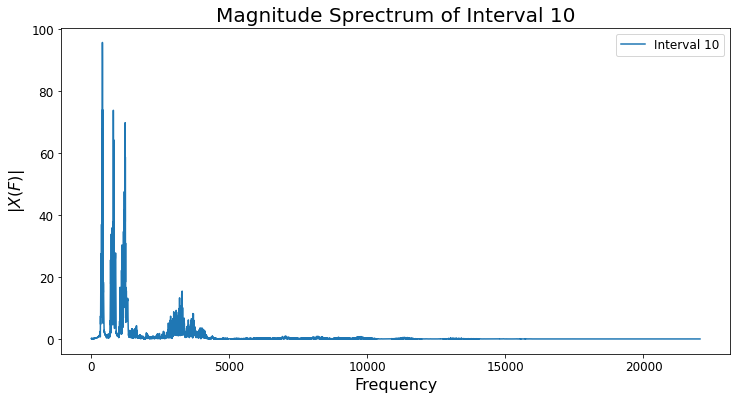

<Figure size 864x432 with 0 Axes>

In [63]:
for i in range(10):
  plot_spectrum(parts[i],opera_fs,opera_fs/2,'Interval {}'.format(i + 1))

In [64]:
for i in range(10):
  interval_ff = find_fundamental_harmonic(parts[i],opera_fs)
  print('Fundamental frequency of Interval {} is {} Hz'.format(i + 1,interval_ff))

Fundamental frequency of Interval 1 is 294.0 Hz
Fundamental frequency of Interval 2 is 312.014150301601 Hz
Fundamental frequency of Interval 3 is 386.0175064628781 Hz
Fundamental frequency of Interval 4 is 444.0201369676629 Hz
Fundamental frequency of Interval 5 is 566.0256700984172 Hz
Fundamental frequency of Interval 6 is 592.0268492902172 Hz
Fundamental frequency of Interval 7 is 596.0270307043404 Hz
Fundamental frequency of Interval 8 is 528.0239466642478 Hz
Fundamental frequency of Interval 9 is 418.0189577758628 Hz
Fundamental frequency of Interval 10 is 344.0156016145857 Hz


From the graphs and fundamental frequencies of the interval, it following observation can be made:



1.   Amplitude increases till the 6th interval and then it deacreases till 10 interval. This is because the intensity of the voice increases and then decreases.
2.   Fundamental Frequency shows a similar pattern as Amplitude, due to the increasing notes till the 6th interval and then the decreasing notes.

